<a href="https://colab.research.google.com/github/RafaelCaballero/BME/blob/main/c%C3%B3digo/proyecto6_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Proyecto 6

Regresión logística y regresión lineal

Como siempre comenzamos preparando los datos. Primer instalamos la librería que nos permitirá su descarga.


In [1]:
modules = ["ucimlrepo"]

import sys
import os.path
from subprocess import check_call
import importlib
import os

def instala(modules):
    print("Instalando módulos")
    for m in modules:
        # para el import quitamos [...] y ==...
        p = m.find("[")
        mi = m if p==-1 else m[:p]
        p = mi.find("==")
        mi = mi if p==-1 else mi[:p]
        torch_loader = importlib.util.find_spec(mi)
        if torch_loader is not None:
            print(m," encontrado")
        else:
            print(m," No encontrado, instalando...",end="")
            try:
                r = check_call([sys.executable, "-m", "pip", "install", "--user", m])
                print("¡hecho!")
            except:
                print("¡Problema al instalar ",m,"! ¿seguro que el módulo existe?",sep="")

    print("¡Terminado!")

instala(modules)

Instalando módulos
ucimlrepo  encontrado
¡Terminado!


En este caso son  datos de crecimiento de plantas de soja. Lo detalles de las columnas se pueden ver [aquí](https://archive.ics.uci.edu/dataset/913/forty+soybean+cultivars+from+subsequent+harvests) (ver tabla en la parte de abajo de la página). La carga es un poco particular porque usamos la API de la universidad de Irvine, pero resultado es un dataframe `df` como siempre:

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
forty_soybean_cultivars_from_subsequent_harvests = fetch_ucirepo(id=913)

# data (as pandas dataframes)
df = forty_soybean_cultivars_from_subsequent_harvests.data.features


df = df.drop(columns=["Cultivar"])
df

,Season,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,1,58.80,15.20,98.20,177.80,1.81,5.20,152.20,3232.820000
1,1,2,58.60,13.40,102.00,195.00,1.85,7.20,141.69,3517.360000
2,1,3,63.40,17.20,100.40,203.00,2.02,6.80,148.81,3391.460000
3,1,4,60.27,15.27,100.20,191.93,1.89,6.40,148.50,3312.580000
4,1,1,81.20,18.00,98.80,173.00,1.75,7.40,145.59,3230.990000
...,...,...,...,...,...,...,...,...,...,...
315,2,4,88.33,16.33,75.73,139.00,1.84,3.67,135.19,3348.931034
316,2,1,64.40,16.60,76.00,168.00,2.21,3.60,145.69,3418.850575
317,2,2,64.60,17.60,116.80,271.20,2.32,3.80,147.24,3651.586207
318,2,3,58.80,14.80,86.40,180.60,2.09,2.20,156.32,3487.931034


In [ ]:
len(df.PH.unique())

188

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      320 non-null    int64  
 1   Repetition  320 non-null    int64  
 2   PH          320 non-null    float64
 3   IFP         320 non-null    float64
 4   NLP         320 non-null    float64
 5   NGP         320 non-null    float64
 6   NGL         320 non-null    float64
 7   NS          320 non-null    float64
 8   MHG         320 non-null    float64
 9   GY          320 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 25.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Season,320.0,1.500000,0.500783,1.00,1.000000,1.500000,2.000000,2.00
Repetition,320.0,2.500000,1.119785,1.00,1.750000,2.500000,3.250000,4.00
PH,320.0,68.386781,8.958194,47.60,62.950000,67.200000,74.347500,94.80
IFP,320.0,15.465000,3.024300,7.20,13.600000,15.600000,17.330000,26.40
NLP,320.0,59.088313,20.068187,20.20,44.350000,54.500000,71.220000,123.00
NGP,320.0,135.085844,60.494529,47.80,95.052500,123.000000,161.350000,683.40
NGL,320.0,2.290844,0.840116,0.94,2.000000,2.280000,2.480000,14.86
NS,320.0,4.071656,1.474531,0.40,3.000000,3.800000,5.000000,9.00
MHG,320.0,168.322313,19.625566,127.06,153.845000,166.150000,183.182500,216.00
GY,320.0,3418.553794,503.003602,1538.23,3126.611552,3397.276724,3708.262931,4930.00


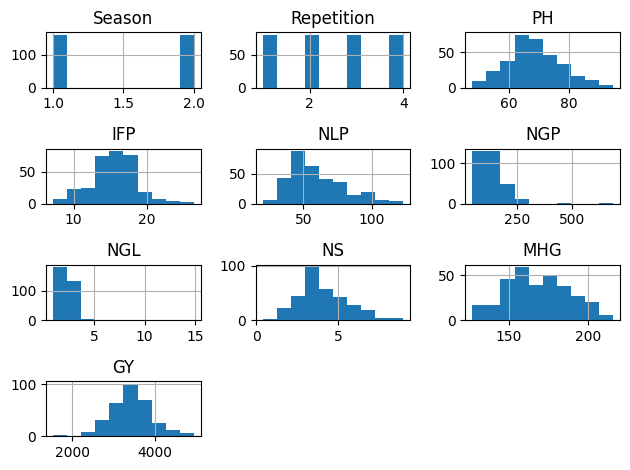

In [ ]:
import matplotlib.pyplot as plt

df.hist()
plt.tight_layout()


**Ejercicio 1**

Queremos  obtener la altura de la planta (columna `PH`) a partir del resto. Podemos tomar como punto de partida el notebook [proyecto4_sol](https://github.com/RafaelCaballero/BME/blob/main/c%C3%B3digo/proyecto_4_sol.ipynb)

In [ ]:
df.columns

Index(['Season', 'Repetition', 'PH', 'IFP', 'NLP', 'NGP', 'NGL', 'NS', 'MHG',
       'GY'],
      dtype='object')

In [6]:
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import math

#### Solución
# Paso 1
yColumn = "PH"

XColumns = [c for c in df.columns if c!=yColumn]

X = df[XColumns]
y = df[yColumn]

# paso 2

# OJO series temporales: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

from sklearn.model_selection import train_test_split

test = 0.40 # 40%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test)

# paso 3
from sklearn.linear_model import LinearRegression
metodo = LinearRegression()
modelo = metodo.fit(X_train,y_train)

# paso 4
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test,y_pred)
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test,y_pred)
print( f"r^2: {round(r2,3)} RMSE: {round(rmse,3)}, MAE:{round(mae,3)}" )


r^2: 0.205 RMSE: 7.044, MAE:5.295


¿Qué rango de error tendrán las predicciones que hagamos?

**Ejercicio 2** Nos damos cuenta de que realmente no necesitamos una regresión, porque solo queremos dstinguir entre dos tipos de altura: planteas altas (1) y plantas bajas, (0), tomando com punto de división la mediana. Podemos construir una columna `label` a partir de `PH`:

In [7]:
mediana = df.PH.median()
df["label2"] = 0

filtro = df.PH > mediana
df.loc[filtro,"label2"] = 1
df

,Season,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY,label2
0,1,1,58.80,15.20,98.20,177.80,1.81,5.20,152.20,3232.820000,0
1,1,2,58.60,13.40,102.00,195.00,1.85,7.20,141.69,3517.360000,0
2,1,3,63.40,17.20,100.40,203.00,2.02,6.80,148.81,3391.460000,0
3,1,4,60.27,15.27,100.20,191.93,1.89,6.40,148.50,3312.580000,0
4,1,1,81.20,18.00,98.80,173.00,1.75,7.40,145.59,3230.990000,1
...,...,...,...,...,...,...,...,...,...,...,...
315,2,4,88.33,16.33,75.73,139.00,1.84,3.67,135.19,3348.931034,1
316,2,1,64.40,16.60,76.00,168.00,2.21,3.60,145.69,3418.850575,0
317,2,2,64.60,17.60,116.80,271.20,2.32,3.80,147.24,3651.586207,0
318,2,3,58.80,14.80,86.40,180.60,2.09,2.20,156.32,3487.931034,0


In [8]:
import pandas as pd
forty_soybean_cultivars_from_subsequent_harvests = fetch_ucirepo(id=913)

# data (as pandas dataframes)
df = forty_soybean_cultivars_from_subsequent_harvests.data.features

df['label'] = pd.qcut(df["PH"], q=2, labels=[ 0, 1]) # pd.qcut genera el valor 0 para la altura por debajo de la mediana y 1 por encima.
df = df.drop(columns=["Cultivar","PH"]) # PH se sustituye por label
df

,Season,Repetition,IFP,NLP,NGP,NGL,NS,MHG,GY,label
0,1,1,15.20,98.20,177.80,1.81,5.20,152.20,3232.820000,0
1,1,2,13.40,102.00,195.00,1.85,7.20,141.69,3517.360000,0
2,1,3,17.20,100.40,203.00,2.02,6.80,148.81,3391.460000,0
3,1,4,15.27,100.20,191.93,1.89,6.40,148.50,3312.580000,0
4,1,1,18.00,98.80,173.00,1.75,7.40,145.59,3230.990000,1
...,...,...,...,...,...,...,...,...,...,...
315,2,4,16.33,75.73,139.00,1.84,3.67,135.19,3348.931034,1
316,2,1,16.60,76.00,168.00,2.21,3.60,145.69,3418.850575,0
317,2,2,17.60,116.80,271.20,2.32,3.80,147.24,3651.586207,0
318,2,3,14.80,86.40,180.60,2.09,2.20,156.32,3487.931034,0


Probar un clasificador basado en regresión logística para determinar `label` a partir del resto de columnas. Para ver los errores podemos utilizar la siguiente función

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, accuracy_score, recall_score,cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# para mostrar las funciones de error. Se le pasan os valores reales (los del test) y los predicho
def show_results(y_real,y_pred):
    print("\nKappa ", round(cohen_kappa_score(y_real,y_pred),4) )
    cm = confusion_matrix(y_real, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=modelo.classes_)
    disp.plot()

    plt.show()
    print('\nClassification Report: \n', classification_report(y_real, y_pred))
    return


El código para hacer la regresión se puede extraer de [15logistica](https://github.com/RafaelCaballero/BME/blob/main/c%C3%B3digo/15logistica.ipynb), en la casilla donde se hacen los 4 pasos, pero adaptándolos. En particular recordar que la y ahora es `label`, que el dataframe se llama `df`. Poner el número de iteraciones de la regresión logística (parámetro `max_iter`) a  10000



Kappa  0.3298


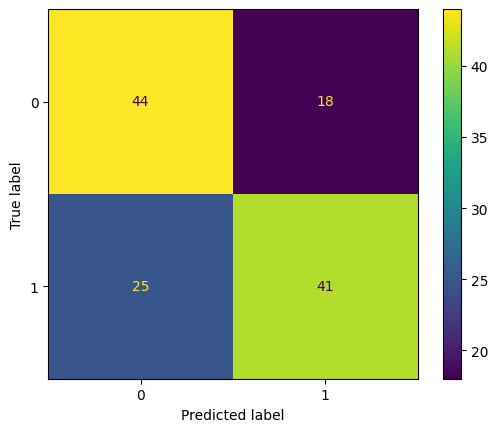


Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.71      0.67        62
           1       0.69      0.62      0.66        66

    accuracy                           0.66       128
   macro avg       0.67      0.67      0.66       128
weighted avg       0.67      0.66      0.66       128



In [18]:
from sklearn.linear_model import LogisticRegression

# solución; ver los pasos 1,2,3,4 del notebook 15logistica, en la celda en la que se aplica la regresión logística,
# pero recordar que aquí no es df2, sino df, y que la columna a predecir es 'label' y no 'survived'
#### Solución
# Paso 1
yColumn = "label"

XColumns = [c for c in df.columns if c!=yColumn]

X = df[XColumns]
y = df[yColumn]

# paso 2

# OJO series temporales: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

from sklearn.model_selection import train_test_split

test = 0.40 # 40%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test)

# paso 3

metodo = LogisticRegression(max_iter=10000)
modelo = metodo.fit(X_train,y_train)

# paso 4
y_pred = modelo.predict(X_test)
show_results(y_test, y_pred)

Intentar interpretar, en la medida de lo posible los resultados ¿son buenos?

Aquí con validación cruzada

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score, make_scorer
import numpy as np

def kappa_scorer(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred)

# Paso 1
yColumn = "label"

XColumns = [c for c in df.columns if c!=yColumn]

X = df[XColumns]
y = df[yColumn]


# Configuración de parámetros
n_repeticiones = 100
n_folds = 10

# Crear un scorer personalizado para calcular Kappa de Cohen


kappa_metric = make_scorer(kappa_scorer)

# Configuración del modelo
metodo = LogisticRegression(max_iter=10000)

# Configuración de la validación cruzada repetida
particiones = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeticiones)

# Evaluación con cross_val_score
kappa_scores = cross_val_score(metodo, X, y, cv=particiones, scoring=kappa_metric, n_jobs=-1)

# Resultados
kappa_mean = np.mean(kappa_scores)
kappa_std = np.std(kappa_scores)

print(f"Kappa promedio: {kappa_mean:.4f}")
print(f"Desviación estándar de Kappa: {kappa_std:.4f}")
